# HSE 2021: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1 points)
* [Task 2](#task2) (1 points)
* [Task 3](#task3) (1 points)
* [Task 4](#task4) (1 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Download the file `data_Mar_64.txt`.

In [1]:
#!wget https://raw.githubusercontent.com/AKuzina/ml_se/main/hw/hw_5/data_Mar_64.txt

In [2]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/ml/datasets/One-hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK. 

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [3]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [4]:
import numpy as np
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics (e.g. Logistic regression).
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y_name)

Split your data into **train** and **test**.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Train a simple classifier on your data to predict target. Calculate accuracy, F-score.

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
model = SVC(C=1e10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))

0.8181186297362768


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=0`

In [8]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2, random_state=55).fit_transform(X)

Select objects that match values from 0 to 14 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<15]` to the `scatter` method.

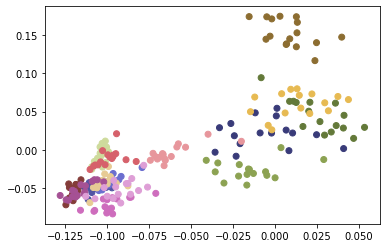

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_pca[y<15,0], X_pca[y<15,1], c = y[y<15], cmap='tab20b')

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

In [10]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, learning_rate='auto',init='random', random_state=54).fit_transform(X)

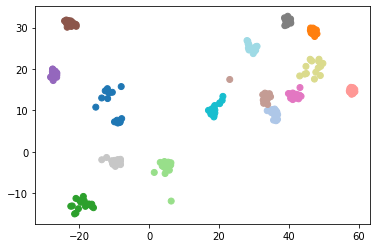

In [11]:
plt.scatter(X_tsne[y<15,0], X_tsne[y<15,1], c = y[y<15], cmap='tab20')

**Task 2. <a id="task2"></a> (1 points)** Specify the coordinates of the object with index 0 (`X[0]`) after applying the TSNE method. Round the numbers to hundredths.

In [12]:
cords_1_tsne = np.round(X_tsne[0],2)

**Task 3. <a id="task3"></a> (1 points)** Specify the coordinates of the object with index 0 (`X[0]`) after applying the PCA method. Round the numbers to hundredths.

In [13]:
cords_1_pca = np.round(X_pca[0],2)

**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

answer – 2


## K_means

**Task 5. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [14]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax): 
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        K = self.centers.shape[0]
        centers = []
        for k in range(K):
            S_k = np.argwhere(self.labels == k)
            c_k = np.mean(X[S_k],axis = 0)
            centers.append(c_k[0,:])
        return np.array(centers)
    
    def update_lables(self, X):
        P = np.shape(X)[0]
        labels = []
        for p in range(P):
            # get pth point
            x_p = X[p][np.newaxis]
            diffs = np.sum((x_p - self.centers)**2,axis = 1)
            # determine closest centroid
            ind = np.argmin(diffs)
            labels.append(ind)
        return np.array(labels)

    def fit(self, X):
        
        r = np.random.choice(X.shape[0], (self.n_clusters))
        self.centers = np.unique(X,axis=0)[r,:]
        
        self.labels = self.update_lables(X)

        for it in range(self.n_iters):
            new_labels = self.update_lables(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0
      
            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);

        return 1
    
    def predict(self, X):
        labels = self.update_lables(X)
        return labels

Generating data for clustering

In [9]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [11]:
X, y = noisy_blobs

**Task 6. <a id="task6"></a> (1.5 points)** 

6.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=100`. Specify the response for the object with index 1.

Converge by tolerance centers


0

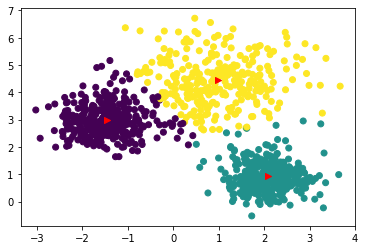

In [17]:
mkm100 = MyKMeans(n_clusters=3, n_iters=100, seed=6767)
mkm100.fit(X)

In [18]:
clast1 = X[np.argwhere(y == 1)]
pred1 = mkm100.predict(clast1)
print(' 0:',sum(pred1==0),'\n','1:',sum(pred1==1),'\n','2:',sum(pred1==2)) 

 0: 218 
 1: 115 
 2: 0


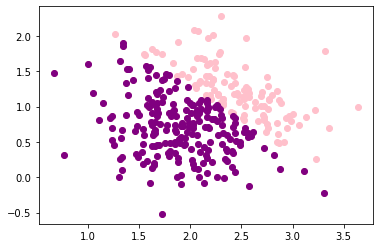

In [19]:
plt.scatter(clast1[:,:,0], clast1[:,:,1], c='pink')
plt.scatter(clast1[np.argwhere(pred1 == 0),:,0], clast1[np.argwhere(pred1 == 0),:,1], c='purple')

6.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 5`. Specify the response for the object with index 1.

Converge by tolerance centers


0

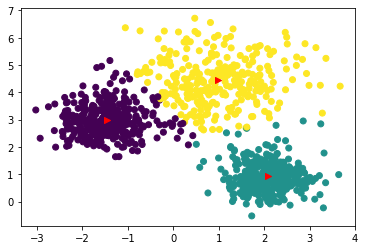

In [20]:
mkm5 = MyKMeans(n_clusters=3, n_iters=5, seed=6767)
mkm5.fit(X)

In [21]:
pred2 = mkm5.predict(clast1)
print(' 0:',sum(pred2==0),'\n','1:',sum(pred2==1),'\n','2:',sum(pred2==2)) 

 0: 218 
 1: 115 
 2: 0


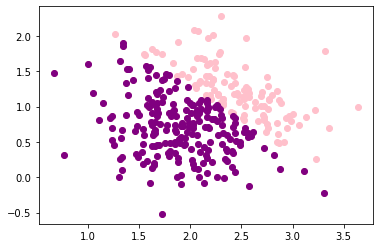

In [22]:
plt.scatter(clast1[:,:,0], clast1[:,:,1], c='pink')
plt.scatter(clast1[np.argwhere(pred2 == 0),:,0], clast1[np.argwhere(pred2 == 0),:,1], c='purple')

6.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 5 to 100

In [23]:
num_of_changed = sum(mkm5.predict(X) != mkm100.predict(X))
print(num_of_changed)

0


**Task 7. <a id="task6"></a> (1.5 points)** 

Using the elbow method, select the optimal number of clusters. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them. To do this, iterate the parameter k from 2 to 50 in steps of 2. 

Converge by tolerance centers


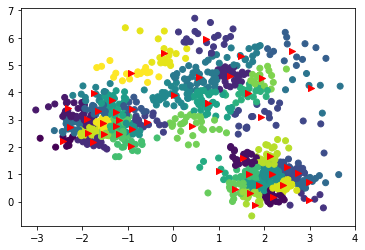

In [24]:
distortions = []
for k in np.arange(2,50,2):
    dist = 0
    mkm = MyKMeans(n_clusters=k, seed=66)
    mkm.fit(X)
    for i in range(k):
        dist += np.sum(np.sum((X[mkm.labels == i] - mkm.centers[i])**2, axis=1), axis=0)
    distortions.append(dist)

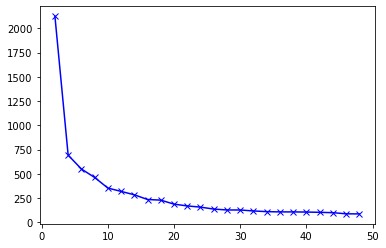

In [25]:
plt.plot(np.arange(2,50,2), distortions, 'bx-')

The optimal k is 10

## DBSCAN

**Task 8. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.5` hyperparameter. Specify the response for the object with index 1.

In [5]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.23)
prediction = clustering.fit_predict(X)
pred = prediction[np.argwhere(y == 1)]
print(' 0:',sum(pred==0),'\n','1:',sum(pred==1),'\n','2:',sum(pred==2),'\n','-1:',sum(pred==-1))

NameError: name 'X' is not defined

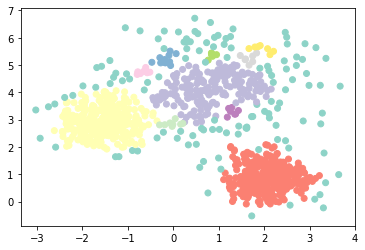

In [27]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='Set3')

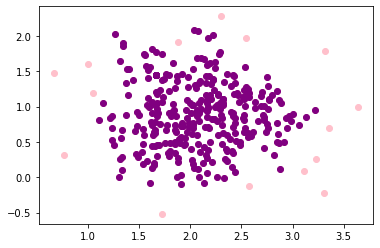

In [28]:
plt.scatter(clast1[:,:,0], clast1[:,:,1], c='pink')
plt.scatter(clast1[np.argwhere(pred == 2),:,0], clast1[np.argwhere(pred == 2),:,1], c='purple')

**Task 9. <a id="task8"></a> (1 point)** 9.1 Specify the resulting number of clusters

In [29]:
num_of_clusters = len(np.unique(clustering.labels_)) - 1
print(num_of_clusters)

10


9.2 How many objects were counted as outliers (marked -1)?

In [30]:
num_of_outliers = sum(clustering.labels_ == -1)
print(num_of_outliers)

123
